Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [3]:
from sndhdr import test_aifc

from sklearn.naive_bayes import GaussianNB

try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/06_Regression'
except ImportError as e:
    pass

# Profiling, Preprocessing, and some PCA

## 1. **Profiling**
   - Involves **understanding the structure, distribution, and quality** of the dataset.
   - Key tasks include **identifying missing values, checking for outliers, and understanding data types**.
   - Profiling helps in gaining **insights about feature relevance, potential noise, or issues with data** that may require cleaning.

## 2. **Preprocessing**
   - Refers to **cleaning and transforming data** before using it.
   - Common steps include **handling missing values, encoding categorical features, scaling numerical data, and normalizing distributions**.
   - Preprocessing ensures that the data is in a **suitable form for analysis and model training**.

## 3. **Principal Component Analysis (PCA)**
   - A dimensionality reduction technique used to **simplify datasets** by transforming features into uncorrelated principal components.
   - PCA reduces complexity **while preserving as much variance as possible**, aiding in visualization and improving model performance.
   - It is useful when dealing with high-dimensional datasets, helping to **mitigate issues like overfitting or multicollinearity**.

In this exercise, we will use a dataset about **WINE** which you can find in **data/wine.csv**.

<div style="text-align: center;">
    <img src="imgs/wine1.png.jpg" style="width: 75%;">
</div>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the data and perform basic exploratory analysis

df = pd.read_csv('data/wine.csv')
df.head(10)

,Label,Grape Type,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class
0,Frappato Sicily 1982,Nebbiolo,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,Barolo
1,Taurasi Umbria 1989,Nebbiolo,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,Barolo
2,Sagrantino Umbria 1994,Barbera,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Barbera
3,Morellino Veneto 2015,Nebbiolo,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Barolo
4,Vino Nobile di Montepulciano Umbria 2008,Nebbiolo,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,Barbaresco
5,Chianti Veneto 1985,Nebbiolo,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,Barolo
6,Sangiovese Sicily 1980,Nebbiolo,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,Barbaresco
7,Raboso Campania 2003,Barbera,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Barbera
8,Frappato Umbria 2021,Nebbiolo,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,Barbaresco
9,Perricone Abruzzo 1987,Barbera,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,Barbera


In [5]:
highest_alcohol = df.loc[df['Alcohol'].idxmax()]

highest_alcohol

Label                    Aglianico Campania 1994
Grape Type                              Nebbiolo
Alcohol                                    14.83
Malic Acid                                  1.64
Ash Content                                 2.17
Ash Alkalinity                              14.0
Magnesium                                     97
Total Phenols                                2.8
Flavonoids                                  2.98
Non-Flavonoid Phenols                       0.29
Proanthocyanins                             1.98
Color Intensity                              5.2
Hue                                         1.08
Phenol Ratio                                2.85
Proline                                     1045
Class                                     Barolo
Name: 134, dtype: object

In [6]:
filtered_df = df[(df['Malic Acid'] > 3.3) & (df['Ash Content'] >= 2.6) & (df["Color Intensity"] < 2.5)]

filtered_df

,Label,Grape Type,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class
47,Vino Nobile di Montepulciano Sicily 1998,Nebbiolo,12.42,4.43,2.73,26.5,102,2.2,2.13,0.43,1.71,2.08,0.92,3.12,365,Barbaresco


# Repetition: Selecting and filtering data with Numpy

## **Repetition 1:** Cole wants to get wasted tonight!

<div style="text-align: center;">
    <img src="imgs/wine2.png.jpg" style="width: 75%;">
</div>

## **Repetition 2:** Don't be like Cindy..

<div style="text-align: center;">
    <img src="imgs/wine3.png.jpg" style="width: 75%;">
</div>

# Profiling: Learn to understand your data better

Before diving into data mining techniques, it is crucial to **profile** the dataset to gain insights into its structure and distribution. One of the fundamental steps in data profiling is computing **descriptive statistics for numerical features**.

The `df.describe()` function provides:
- **Count**: Number of non-missing values.
- **Mean**: The average value.
- **Standard Deviation (std)**: A measure of variability.
- **Min & Max**: The range of values.
- **Quartiles (25%, 50%, 75%)**: Key percentiles indicating data spread.

This step helps detect **outliers, missing values, scaling issues, or skewness**, all of which influence downstream modeling and preprocessing decisions.

In [7]:
df.describe()

,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline
count,178.000000,178.000000,177.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366893,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.275076,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.560000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


While numerical features provide statistical insights, **non-numeric (categorical or textual) features** are equally important in data profiling. These features often require specific preprocessing steps such as encoding, handling missing values, and identifying unique categories.

Key aspects to analyze for non-numeric features:
- **Unique values**: Understanding distinct categories.
- **Frequency distribution**: Checking for imbalances.
- **Missing values**: Identifying potential data gaps.

In [8]:
df.describe(include='object')

,Label,Grape Type,Class
count,178,178,178
unique,178,2,3
top,Frappato Sicily 1982,Nebbiolo,Barbaresco
freq,1,130,71


# Handling Categorical Features in Data Mining

Categorical features require different preprocessing techniques depending on their properties. In this dataset, we categorize the columns as follows:

- **`Label`**: Each value is unique, meaning it might act as an identifier rather than a useful categorical feature. If needed for analysis, **NLP techniques** (such as text vectorization) could be applied.
- **`Grape Type`**: Since it has only **two unique values**, it will be **one-hot encoded**, converting it into binary indicator variables.
- **`Class`**: This will be our **target variable** for classification and is label-encoded

Splitting and encoding these features properly is crucial for ensuring the dataset is suitable for machine learning models.

In [9]:
# Dropping 'Label' since it is unique and not useful for standard encoding
df = df.drop(columns=['Label'])

# One-hot encode 'Grape Type'
df = pd.get_dummies(df, columns=['Grape Type'], dtype=int)

# Display results
print("Processed Feature DataFrame:")
df.head()

Processed Feature DataFrame:


,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class,Grape Type_Barbera,Grape Type_Nebbiolo
0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,Barolo,0,1
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,Barolo,0,1
2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Barbera,1,0
3,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Barolo,0,1
4,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,Barbaresco,0,1


# Correlation Analysis in Data Mining Pipelines

Understanding relationships between features is a crucial step in data preprocessing. Correlation analysis helps in:

- Identifying **strong predictors** of the target variable.
- Detecting **multicollinearity**, where two or more features are highly correlated.
- Finding **redundant or irrelevant features** that contribute little to predictive performance.
- Avoiding **false predictors**, which correlate with the target due to chance but lack causal meaning.

We will use **three different approaches** to analyze feature correlation:

## **1. Scatter Plots with Target Coding**

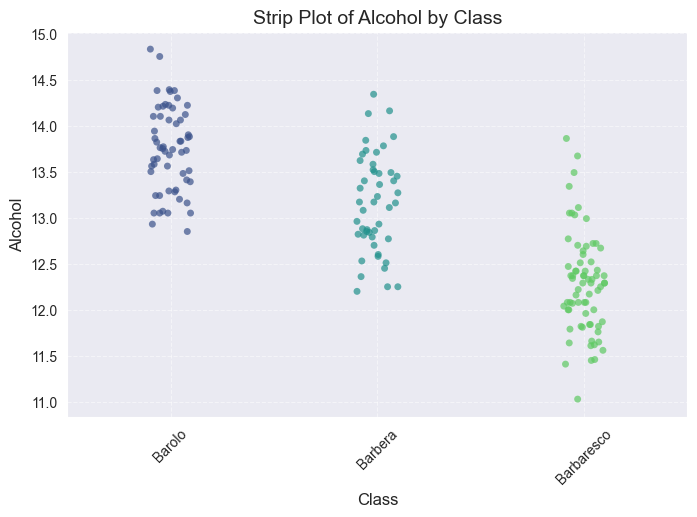

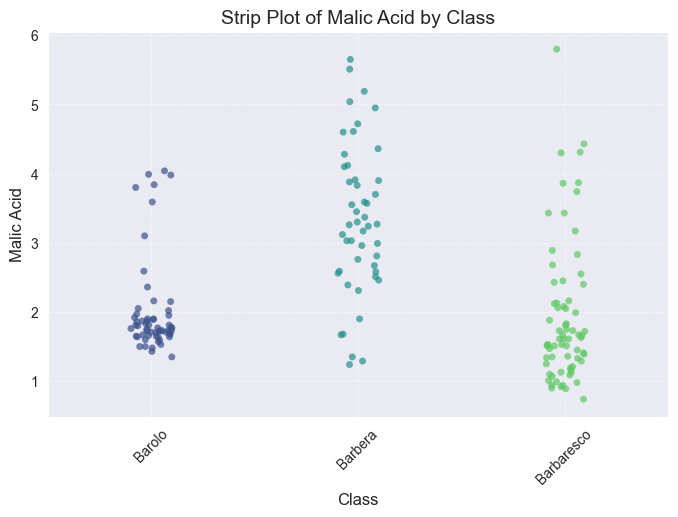

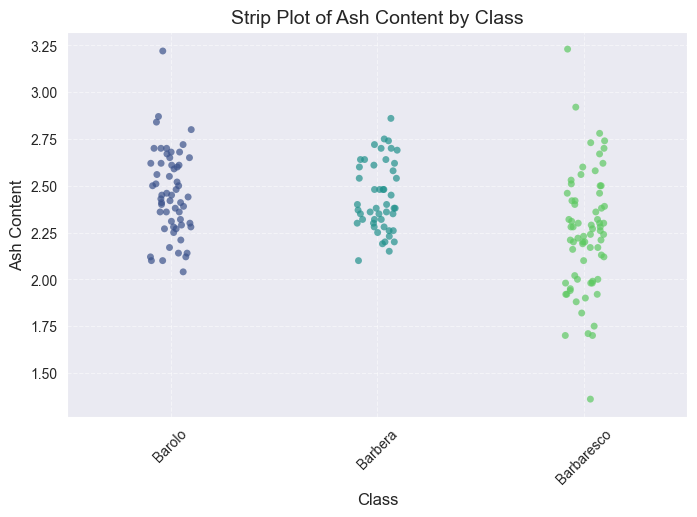

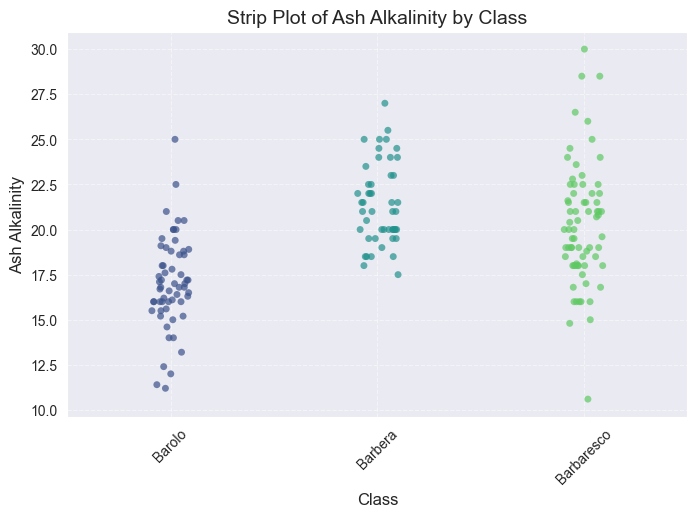

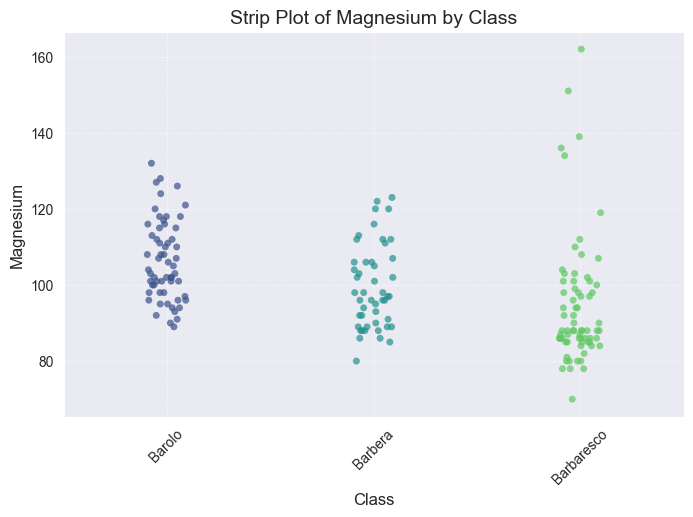

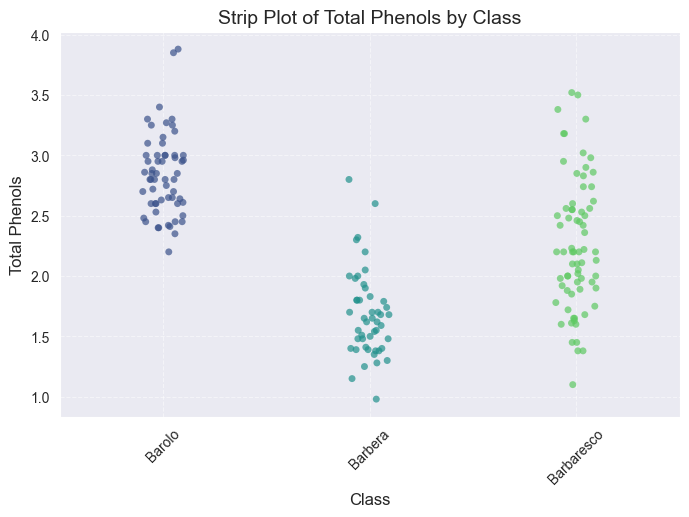

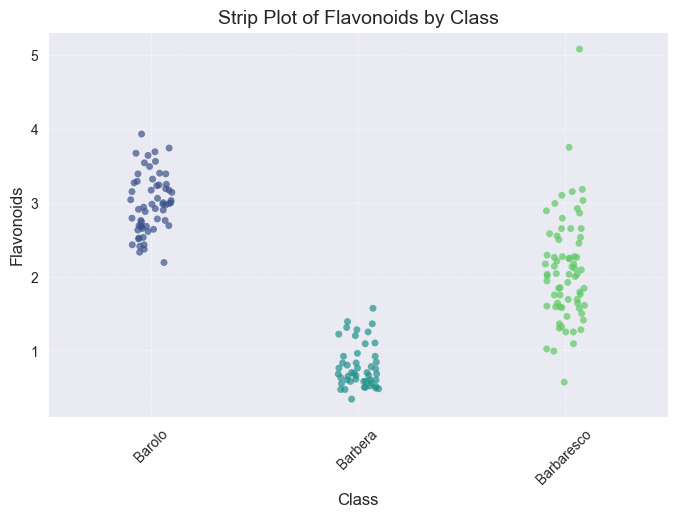

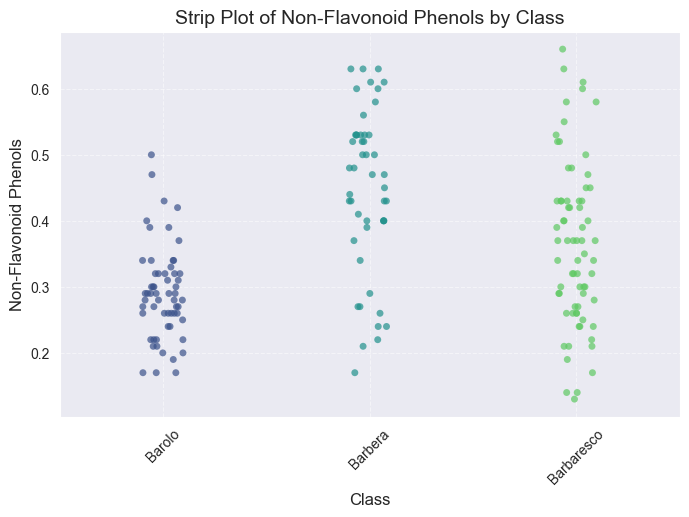

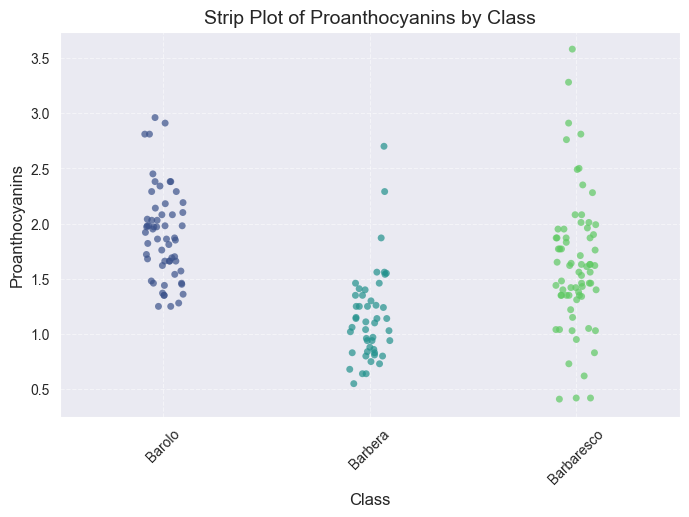

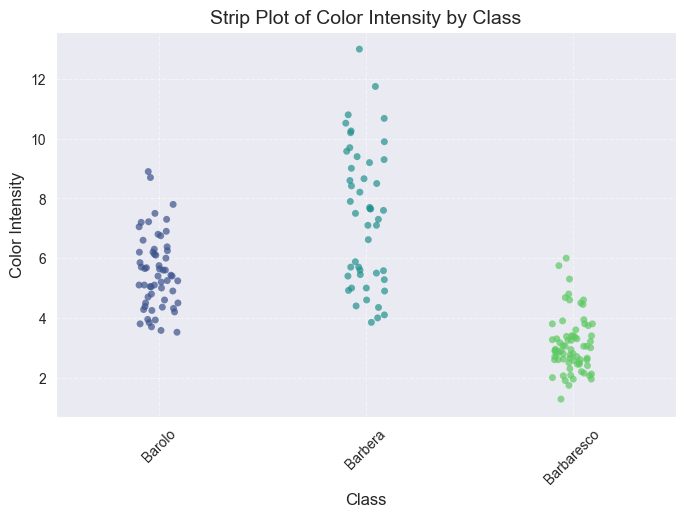

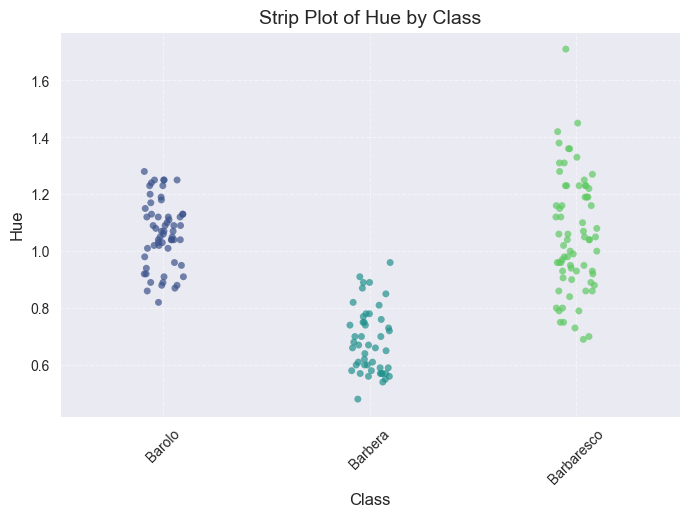

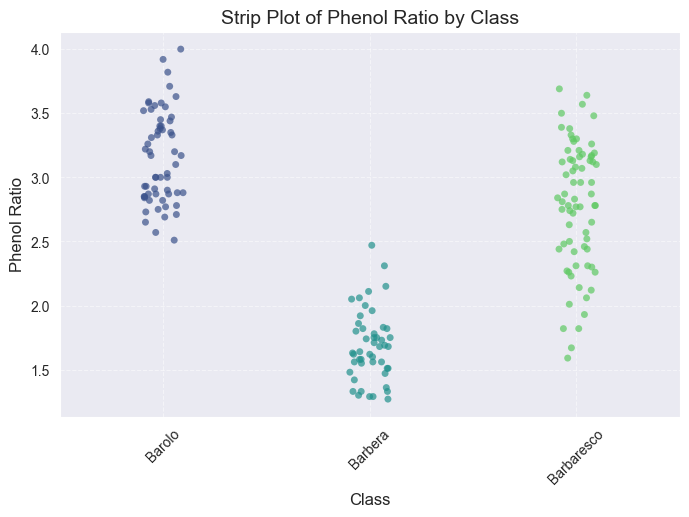

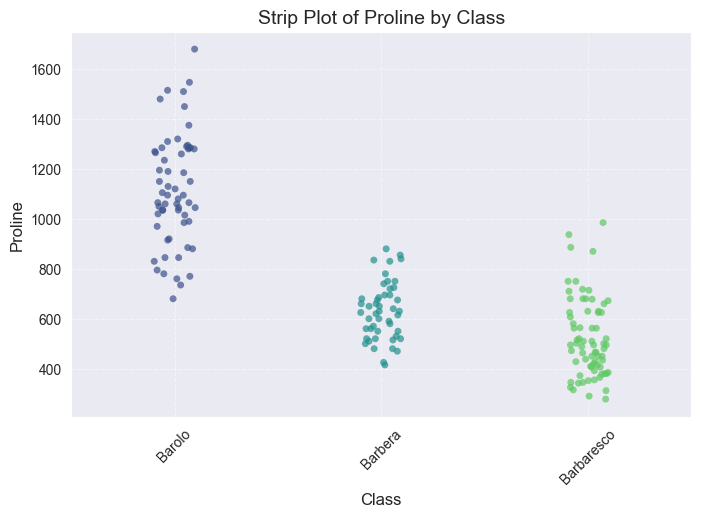

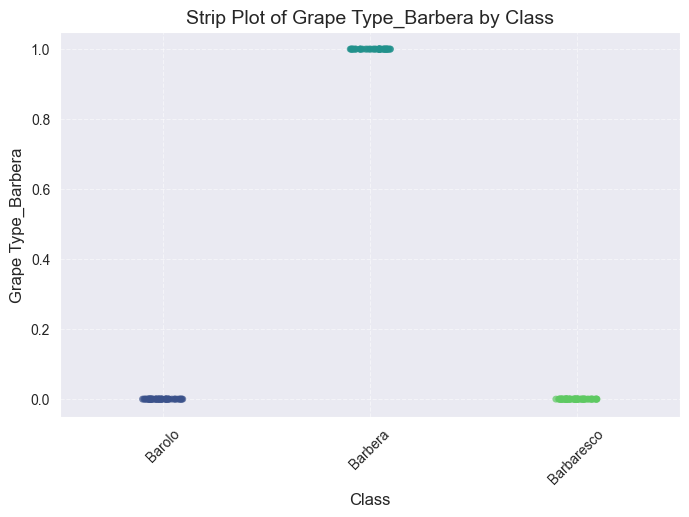

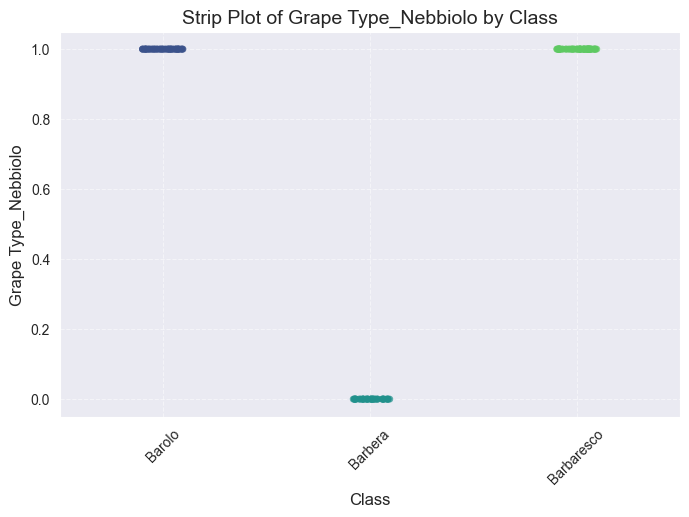

In [10]:
import seaborn as sns

# Iterate over numerical features and plot them against the target
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 5))
    sns.stripplot(x=df['Class'], y=df[col], hue=df['Class'], jitter=True, alpha=0.7, palette="viridis")
    plt.title(f"Strip Plot of {col} by Class", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


## **2. Boxplots by Target Class**
- Examines how feature distributions vary across target categories.
- Detects **features with strong class separation** and **potential outliers**.
- If all class distributions overlap, the feature may not be useful.

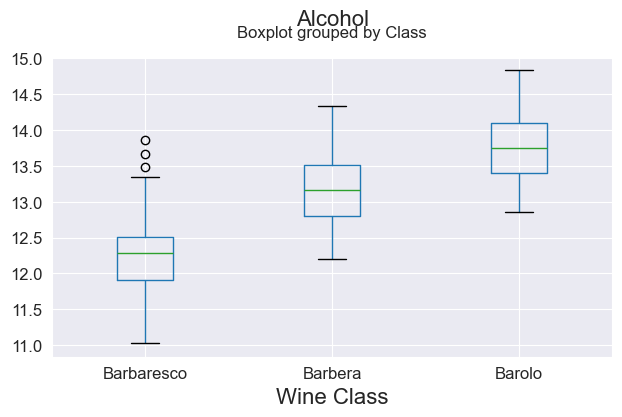

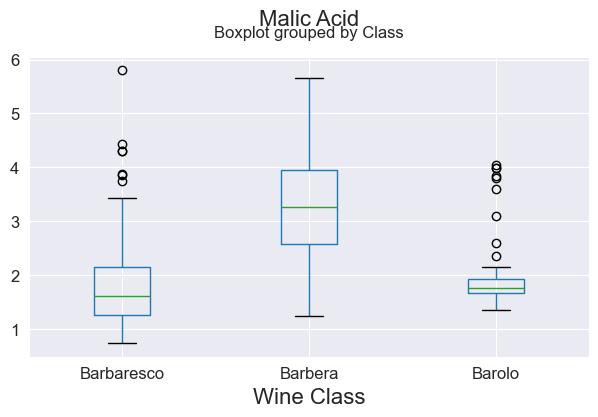

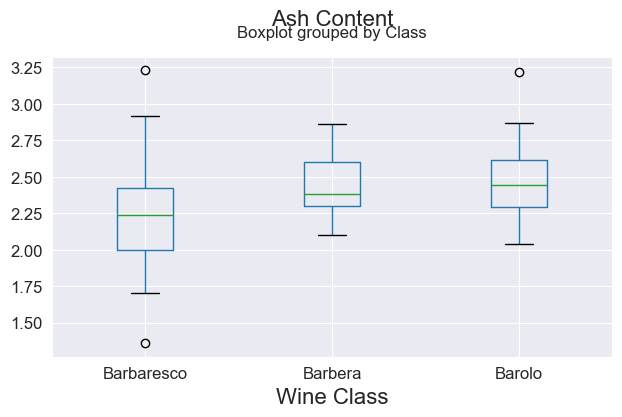

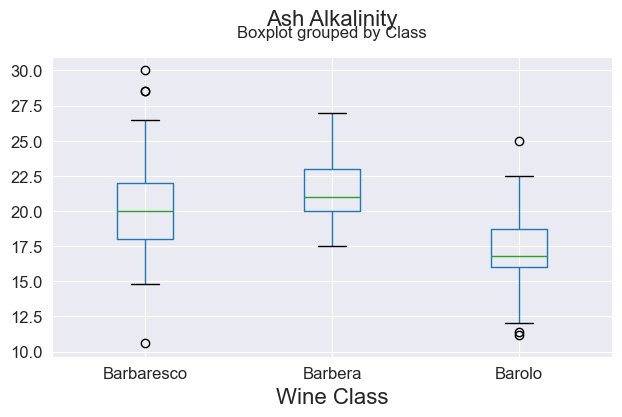

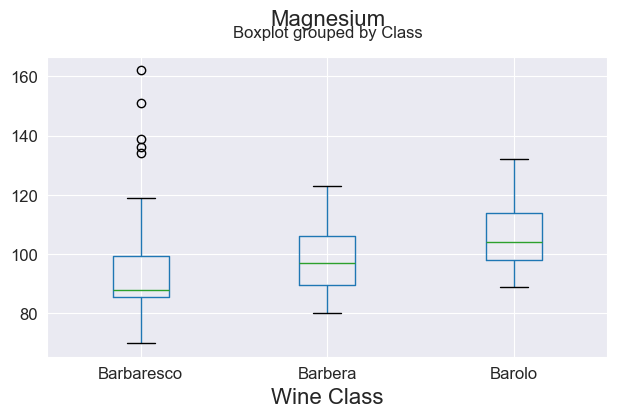

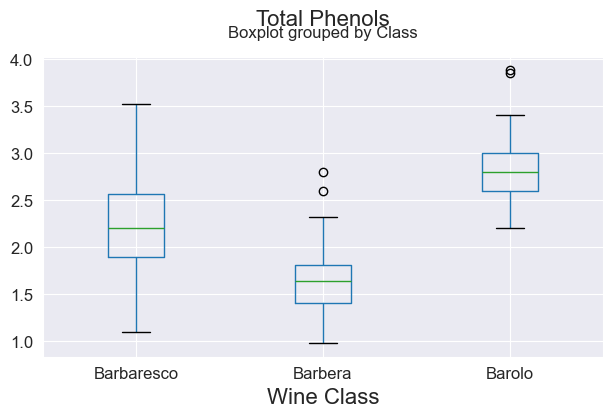

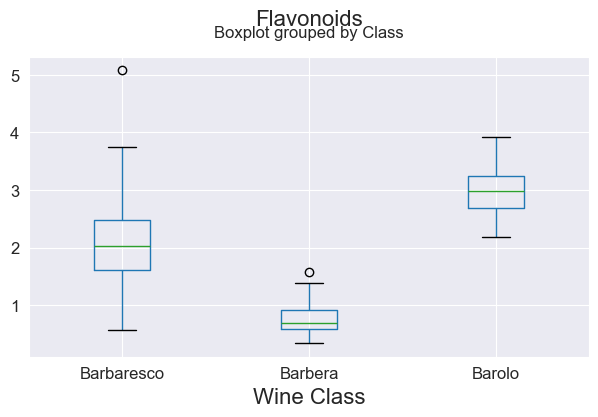

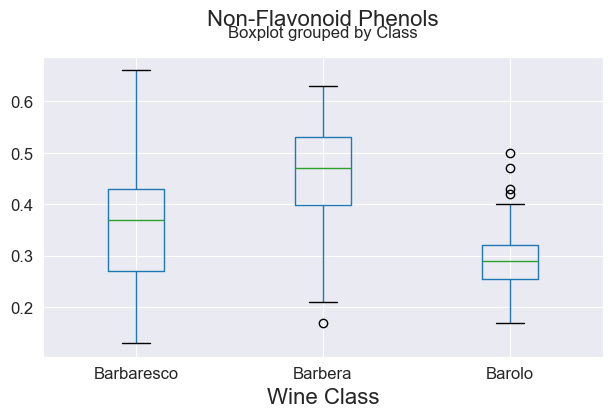

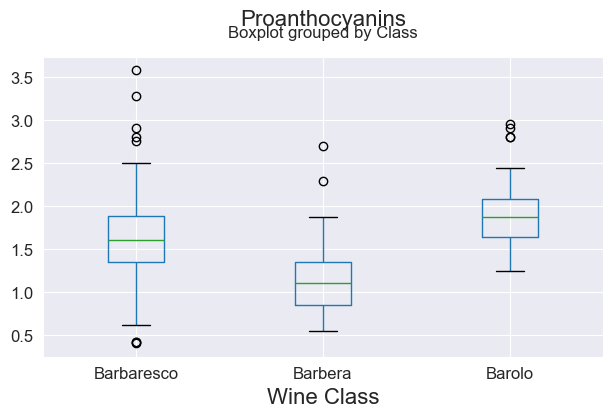

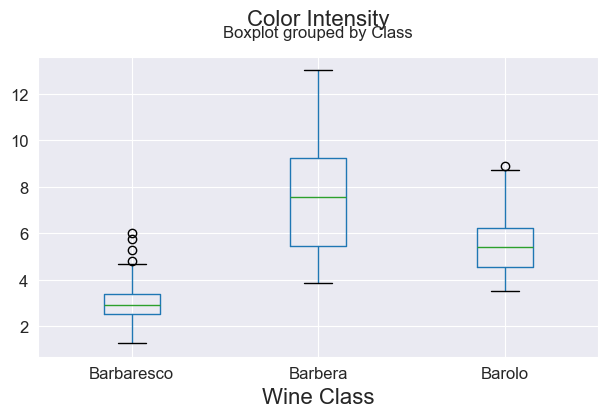

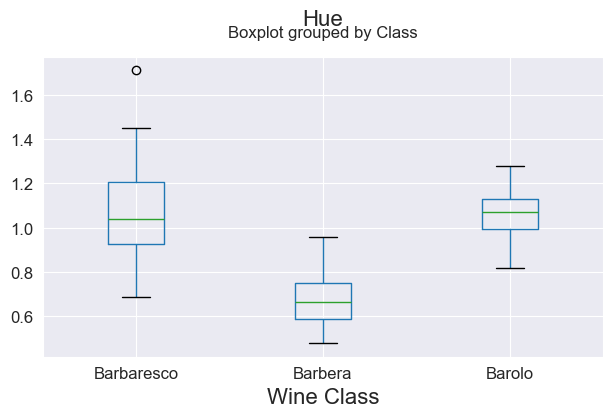

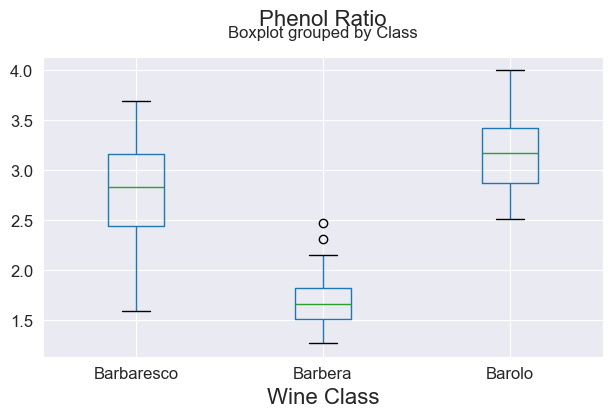

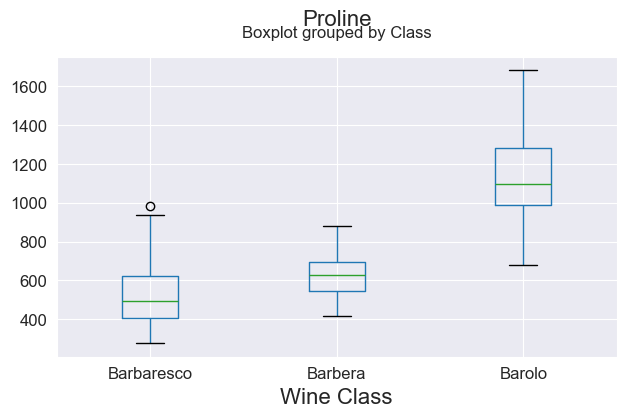

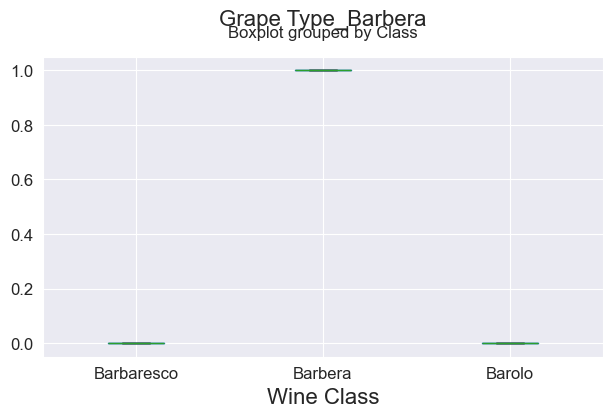

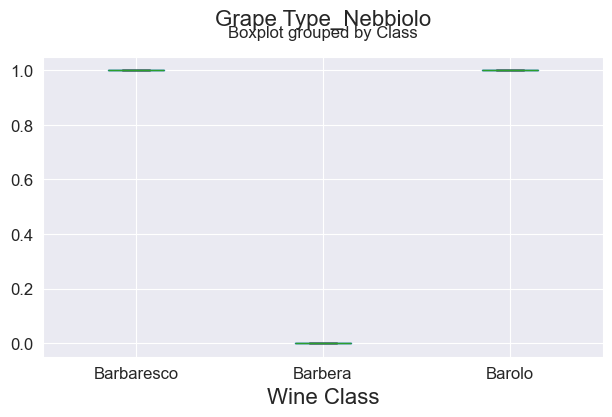

In [11]:
for col in df.select_dtypes(include=['number']).columns:
    df.boxplot(col, by='Class',figsize=(7,4),fontsize=12)
    plt.title("{}\n".format(col),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

## **3. Scatter Plots with Target Color Coding**
- Visualizes the relationship between numerical features.
- The target variable (`Class`) is color-coded to see how well the separation occurs.
- Helps identify **linear, non-linear, or no correlation** patterns.

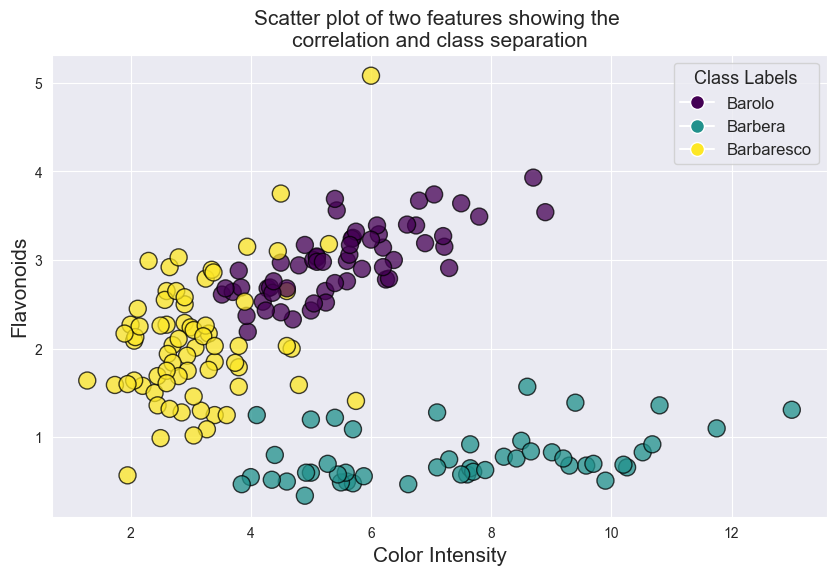

In [12]:
# Define unique class labels and generate distinct colors
class_labels = df['Class'].unique()  # Get unique class labels
num_classes = len(class_labels)
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))  # Generate distinct colors evenly spaced in colormap
color_map = dict(zip(class_labels, colors))  # Map labels to colors

# Assign correct colors to each point
color = df["Class"].map(color_map)

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df['Color Intensity'], df['Flavonoids'], 
    c=color.tolist(),  # Use mapped colors directly
    edgecolors='k', alpha=0.75, s=150
)

# Create legend with correct colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors]
plt.legend(handles, class_labels, title="Class Labels", fontsize=12, title_fontsize=13)

plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class separation", fontsize=15)
plt.xlabel("Color Intensity", fontsize=15)
plt.ylabel("Flavonoids", fontsize=15)
plt.show()

## **4. Correlation Matrix (Heatmap)**
- Computes Pearson correlations between numerical features.
- Identifies **highly correlated features (multicollinearity)**, which can lead to overfitting.
- Checks whether any features **correlate with the target**, indicating predictive power.

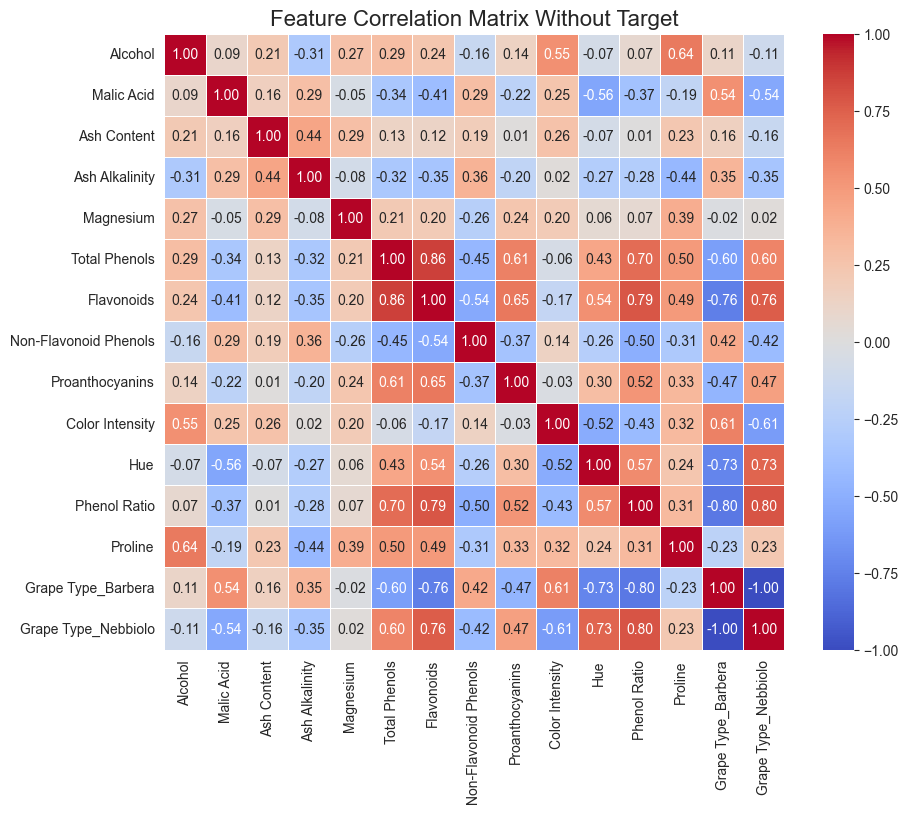

,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Grape Type_Barbera,Grape Type_Nebbiolo
0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,0,1
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,0,1
2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,1,0
3,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,0,1
4,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,0,1


In [13]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix Without Target", fontsize=16)
plt.show()

df.select_dtypes(include=['number']).head()

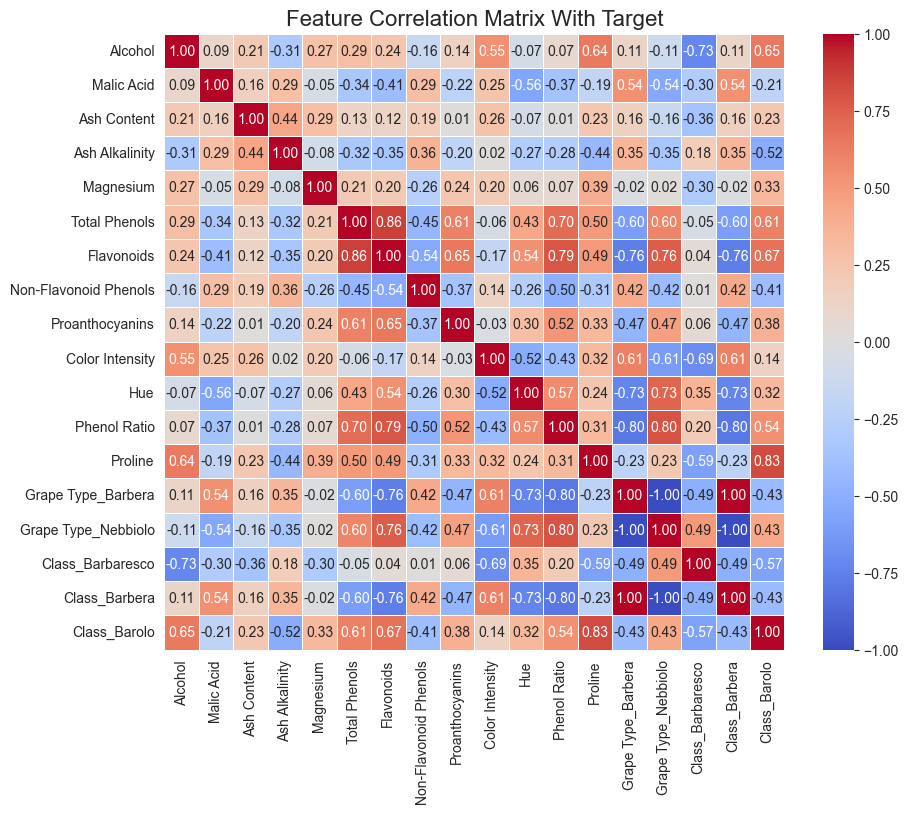

In [14]:
# One-hot encode 'Class' without affecting numerical features
df_encoded = df.copy()  # Create a copy to preserve the original DataFrame
df_encoded = pd.get_dummies(df_encoded, columns=['Class'], dtype=int)

# df.head()

# Compute correlation matrix
corr_matrix = df_encoded.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix With Target", fontsize=16)
plt.show()

## **How to Decide Whether to Keep Features After Correlation Analysis?**

Correlation analysis helps in identifying relationships between features and the target variable. However, just because a feature is **highly correlated** does not always mean it is **useful**. Some features might be **redundant, misleading, or unnecessary** for prediction. Here’s how to decide which features to keep:

---

### **Key Considerations for Feature Selection**
#### **1️⃣ Remove Highly Correlated Features (Multicollinearity)**
- If two features are strongly correlated (e.g., **correlation > 0.8**), one of them is likely redundant.
- Keeping both may lead to **overfitting** and **unstable model performance**.
- **Solution:** Drop one of the two features or apply dimensionality reduction techniques like **PCA**.

#### **2️⃣ Remove Features with No Correlation to the Target**
- If a feature has **low or no correlation** with the target, it likely does not contribute to prediction.
- Example: A feature that is **randomly distributed** across classes.
- **Solution:** Use statistical tests (e.g., ANOVA, chi-square) to confirm irrelevance and remove such features.

#### **3️⃣ Detect and Remove "False Predictors"**
- A feature might **appear predictive** but is actually **deterministic** based on domain knowledge.
- **Example from Our Scenario:**  
  - The feature **“Grape Type = Barbera”** perfectly predicts **Barbera wine**.
  - However, this is **a definition, not a useful predictor**—Barbera wine is always made from Barbera grapes.
  - If we can **always** rely on having grape type information, **this feature alone is sufficient** to classify Barbera wines.
  - **BUT:** If grape type information is sometimes missing, we must **remove this false predictor** and rely on other distinguishing features.

---

### **🛠 Final Decision in Our Scenario: Removing Grape Type Entirely**
- Instead of just removing "Grape Type = Barbera," we **remove all entries** from the **Grape Type** column.  
- Therefore, we assume that information about the grape type is not accessible.

This ensures that our model remains focused on distinguishing **Wine Classes** without relying on misleading or redundant predictors.

---

### **✅ Best Practices for Feature Selection**
✔ **Use correlation analysis** to detect redundant or irrelevant features.  
✔ **Apply domain knowledge** to identify false predictors.  
✔ **Test feature importance** using statistical tests or feature selection methods.  
✔ **Consider feature availability**—keep features that will always be available in real-world applications.  
✔ **Reframe the problem when necessary**—if a feature makes classification trivial, reconsider whether certain data points should be included at all.  

By following these steps, we ensure that our model remains **interpretable, efficient, and reliable** in predicting wine classification. 🍷


In [15]:
df = pd.read_csv('data/wine.csv')

# Drop the "Grape Type" columns (since it's now unnecessary)
df = df.drop(columns=['Grape Type'], errors='ignore')

# Display the first few rows of the cleaned dataset
df.head()

,Label,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class
0,Frappato Sicily 1982,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,Barolo
1,Taurasi Umbria 1989,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,Barolo
2,Sagrantino Umbria 1994,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Barbera
3,Morellino Veneto 2015,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Barolo
4,Vino Nobile di Montepulciano Umbria 2008,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,Barbaresco


Now we should officially perform a profiling again. However, to save some time, we can also use external tools such as ydata-profiling.

In [17]:
# !pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_file("profile_report.html")

# open file in explorer

C:\Users\vince\PycharmProjects\Data Mining\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 45.46it/s]


In [18]:
df[df['Label']== 'immobile Totti 2017']

,Label,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class


# **Handling Missing Values in Data Mining**

Missing values are common in datasets and can significantly impact model performance. Before filling in missing values, we need to **understand their distribution and potential causes**.

### **Why Do Missing Values Occur?**
- **Data entry errors** (e.g., manual input mistakes).
- **Sensor failures** in automated data collection.
- **Intentional omissions** (e.g., survey respondents skipping questions).
- **Merging datasets** where some records lack specific information.

---

<div style="text-align: center;">
    <img src="imgs/wine4.png.jpg" style="width: 75%;">
</div>

### Solution

In [19]:
# Print the matching row
print(df[df['Label'] == 'Brachetto Campania 2015'])

                      Label  Alcohol  Malic Acid  Ash Content  Ash Alkalinity  \
73  Brachetto Campania 2015     14.1        2.16          NaN            18.0   

    Magnesium  Total Phenols  Flavonoids  Non-Flavonoid Phenols  \
73        105           2.95        3.32                   0.22   

    Proanthocyanins  Color Intensity   Hue  Phenol Ratio  Proline   Class  
73             2.38             5.75  1.25          3.17     1510  Barolo  


## **Step 1: Identifying Missing Values**
Before handling missing values, we need to **detect** them and understand their extent.

In [20]:
# Check for missing values in the dataset
missing_summary = df.isnull().sum()

# Display only features with missing values
missing_summary = missing_summary[missing_summary > 0]
print("Missing Values per Column:\n", missing_summary)

Missing Values per Column:
 Ash Content    1
dtype: int64


## **Step 2: Strategies to Handle Missing Values**
Once we identify missing values, we can choose an appropriate strategy based on the nature of the data.

### **Removing Rows or Columns**
✔ Best when a feature has **too many missing values** (e.g., >50%).  
✔ Also useful if **only a few rows** contain missing data and their removal **won’t significantly impact** the dataset.

### **Imputation (Filling Missing Values)**
Instead of removing data, we can **fill in missing values** using different techniques:

| Strategy | When to Use | Example |
|----------|------------|---------|
| Mean / Median Imputation | Numerical features with **few missing values** | Filling missing temperatures with average temperature |
| Mode Imputation | Categorical features with **low variability** | Replacing missing `City` with the most common city |
| Forward / Backward Fill (Time Series) | When missing values follow a sequential pattern | Filling gaps in stock prices using previous values |
| Interpolation | When trends exist in numeric data | Predicting missing values between known points |
| KNN Imputation | When similar instances exist in the dataset | Using nearest neighbors to estimate missing values |

---

In [21]:
# Create a temporary copy of df
df_tmp = df.copy()

# Perform mean imputation for all numerical columns
df_tmp.fillna(df_tmp.mean(numeric_only=True), inplace=True)

# Print the matching row
print(df_tmp[df_tmp['Label'] == 'Brachetto Campania 2015'])

                      Label  Alcohol  Malic Acid  Ash Content  Ash Alkalinity  \
73  Brachetto Campania 2015     14.1        2.16     2.366893            18.0   

    Magnesium  Total Phenols  Flavonoids  Non-Flavonoid Phenols  \
73        105           2.95        3.32                   0.22   

    Proanthocyanins  Color Intensity   Hue  Phenol Ratio  Proline   Class  
73             2.38             5.75  1.25          3.17     1510  Barolo  


# **Train-Test Splitting and Fitting a KNN Predictor**

### **Why Do We Need a Train-Test Split?**
Before training a model, we need to **split** our dataset into:
- **Training Set** → Used to train the model.
- **Test Set** → Used to evaluate model performance on unseen data.

This prevents **overfitting**, where a model performs well on known data but fails on new data.

<div style="text-align: center;">
    <img src="imgs/wine5.png.jpg" style="width: 75%;">
</div>

---

### Solution

In [22]:
print(df[df['Label'] == 'Immobile Totti 2017'])

Empty DataFrame
Columns: [Label, Alcohol, Malic Acid, Ash Content, Ash Alkalinity, Magnesium, Total Phenols, Flavonoids, Non-Flavonoid Phenols, Proanthocyanins, Color Intensity, Hue, Phenol Ratio, Proline, Class]
Index: []


### First we need to split our dataset into Features and Targets

In [23]:
X = df.drop(columns=['Class'], errors='ignore')
y = df['Class']

X.head()

,Label,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline
0,Frappato Sicily 1982,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
1,Taurasi Umbria 1989,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
2,Sagrantino Umbria 1994,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
3,Morellino Veneto 2015,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
4,Vino Nobile di Montepulciano Umbria 2008,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


## **Step 1: Splitting Data into Training and Test Sets**
We will:
- **Separate features (`X`) and the target (`y`)**  
- **Perform an 80-20 train-test split**  
- **Use stratification** to ensure class balance in both splits  

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('Num of total entries:', len(X))
print('Num of train entries:', len(X_train))
print('Num of test entries:', len(X_test))

# Check for missing values in the dataset
missing_summary = X_train.isnull().sum()

# Display only features with missing values
missing_summary = missing_summary[missing_summary > 0]
print("Missing Values per Column:\n", missing_summary)

Num of total entries: 178
Num of train entries: 142
Num of test entries: 36
Missing Values per Column:
 Ash Content    1
dtype: int64


In [25]:
# Perform mean imputation for all numerical columns IN THE TRAINING DATA
X_train.fillna(X_train.mean(numeric_only=True), inplace=True)

# Print the matching row
print(X_train[X_train['Label'] == 'Brachetto Campania 2015'])

                      Label  Alcohol  Malic Acid  Ash Content  Ash Alkalinity  \
73  Brachetto Campania 2015     14.1        2.16     2.368156            18.0   

    Magnesium  Total Phenols  Flavonoids  Non-Flavonoid Phenols  \
73        105           2.95        3.32                   0.22   

    Proanthocyanins  Color Intensity   Hue  Phenol Ratio  Proline  
73             2.38             5.75  1.25          3.17     1510  


**IMPORTANT:** When missing values are filled by only looking at the training data, these filler (obviously) differ!

## **Step 2: Training a k-Nearest Neighbors (k-NN) Classifier**
We will train a **k-NN model** using **ONLY** the training set. We set **k=3** and we will also derive key characteristics regarding its performance on the test data which is **NOT** used in the training procedure:

- Measure **accuracy** to see how well the model classifies new instances.  
- Compute a **confusion matrix** to analyze misclassifications.  
- Use a **classification report** for precision, recall, and F1-score.

In [26]:
X = X.drop(columns=['Label'], errors='ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.fillna(X_train.mean(numeric_only=True), inplace=True)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

def predict_knn(X_train, X_test, y_train, y_test):

    # Initialize the K-NN classifier (with k=5, you can adjust the number of neighbors)
    knn = KNeighborsClassifier(n_neighbors=3)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Measure performance
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' handles multi-class labels
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Output results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Detailed classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

In [28]:
predict_knn(X_train, X_test, y_train, y_test)

Accuracy: 0.7222
Recall: 0.7222
Precision: 0.7396
F1-Score: 0.7271

Classification Report:

              precision    recall  f1-score   support

  Barbaresco       0.69      0.79      0.73        14
     Barbera       0.50      0.50      0.50        10
      Barolo       1.00      0.83      0.91        12

    accuracy                           0.72        36
   macro avg       0.73      0.71      0.71        36
weighted avg       0.74      0.72      0.73        36



# Importance of Scaling Numeric Data in Machine Learning

## Why Scale Your Data?
Scaling numeric data is an essential preprocessing step in machine learning. Many algorithms perform better when features have a consistent range and distribution. This is especially crucial for models that rely on distance metrics (e.g., k-NN, SVMs) or gradient-based optimization (e.g., neural networks, logistic regression).

## Types of Scaling

There are several common scaling techniques, each suitable for different scenarios:

### 1️⃣ Standardization (StandardScaler)
- Transforms data to have **zero mean** and **unit variance**:
  $$
  X_{\text{scaled}} = \frac{X - \mu}{\sigma}
  $$
- Useful when data follows a **normal distribution**.

### 2️⃣ Min-Max Scaling (MinMaxScaler)
- Scales data to a fixed range, usually **[0,1]**:
  $$
  X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  $$
- Preserves relative relationships but **sensitive to outliers**.

### 3️⃣ Robust Scaling (RobustScaler)
- Uses the **median** and **interquartile range** (IQR), making it robust to **outliers**:
  $$
  X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)}
  $$
- Suitable for datasets with extreme values.

---

## ⚠️ **Avoid Data Leakage: Never Fit a Scaler on the Full Dataset!**
One of the most critical mistakes in machine learning is **data leakage**—when information from the test set influences the training process. **This must never happen!**

### ❌ Bad Practice:
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)  # Wrong! Includes test data
```

### ✅ Good Practice:
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Correct! Scaler is fit to the train data only
X_test_scaled = scaler.transform(X_test)
```

In [29]:
from sklearn.preprocessing import StandardScaler

# Feature scaling: K-NN works better with normalized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
predict_knn(X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy: 0.9722
Recall: 0.9722
Precision: 0.9744
F1-Score: 0.9723

Classification Report:

              precision    recall  f1-score   support

  Barbaresco       1.00      0.93      0.96        14
     Barbera       1.00      1.00      1.00        10
      Barolo       0.92      1.00      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



*Hey ChatGPT, please make this code output understandable for a beginner*

![Alt text](imgs/confusion.jpg)

# Principal Component Analysis (PCA)

In [31]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Or GaussianNB for Naive Bayes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# Apply PCA to reduce dimensions (you can choose the number of components, here it's set to 2 for visualization)
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

predict_knn(X_train_pca, X_test_pca, y_train, y_test)

print(X_train_pca)

Accuracy: 0.9722
Recall: 0.9722
Precision: 0.9744
F1-Score: 0.9723

Classification Report:

              precision    recall  f1-score   support

  Barbaresco       1.00      0.93      0.96        14
     Barbera       1.00      1.00      1.00        10
      Barolo       0.92      1.00      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

[[-2.40141676 -0.5647388 ]
 [-1.33748265 -2.10213396]
 [-2.33245833  2.42873181]
 [-3.59010669  1.32784534]
 [-0.52907259 -2.55536367]
 [-2.78780368  0.30291076]
 [-2.40970339  2.20697985]
 [-2.46831208  0.02616129]
 [-0.96078061 -3.37396716]
 [ 0.13374637 -2.26576878]
 [-2.41207735  0.37060243]
 [-0.24207232 -2.78255082]
 [-1.59673774 -0.92069213]
 [ 3.22398471  2.05354648]
 [-0.63045399 -2.68266403]
 [ 0.50420116 -0.84821319]
 [ 0.8618998  -2.46028849]
 [-1.10330982 -0.39311901]
 [-2.58372315  1.83382715]
 [ 0.53303634 


## Brief Overview

Principal Component Analysis (PCA) is a technique used for **dimensionality reduction** and **feature extraction** by transforming the original dataset into a new coordinate system. In this new system, the axes (called **principal components**) are ordered by the amount of variance they capture from the data. PCA is commonly used to simplify data, reduce noise, and discover patterns by retaining only the most important features.

PCA achieves this transformation by projecting the data onto the **eigenvectors** of the covariance matrix of the data. The **eigenvalues** associated with these eigenvectors tell us how much variance each principal component captures.

### Steps of PCA

1. **Data Centering**:
   PCA requires the data to be **centered**, which means subtracting the mean of each feature (column) from the data. This ensures that the new axes represent variance correctly. If your original data matrix is $X$, then the centered data matrix is:

   $$ X_{\text{centered}} = X - \mu $$

   where $\mu$ is the mean vector of the data.

2. **Covariance Matrix**:
   The next step is to compute the **covariance matrix** of the centered data. This matrix represents how the different features vary with respect to each other. For a centered data matrix $X_{\text{centered}}$, the covariance matrix $\Sigma$ is calculated as:

   $$ \Sigma = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}} $$

   where $n$ is the number of observations.

3. **Eigenvalue Decomposition**:
   PCA involves finding the **eigenvectors** and **eigenvalues** of the covariance matrix. The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues tell us how much variance is captured along these directions. The eigenvalue equation is:

   $$ \Sigma \mathbf{v}_k = \lambda_k \mathbf{v}_k $$

   where:
   - $\mathbf{v}_k$ are the **eigenvectors** of $\Sigma$, which represent the principal component directions.
   - $\lambda_k$ are the **eigenvalues**, which represent the amount of variance captured by each principal component.

   The **first eigenvector** $\mathbf{v}_1$ captures the direction of **maximum variance** in the data, meaning the first principal component captures more variance than any other component. Each successive eigenvector captures the maximum variance that is orthogonal (uncorrelated) to the previous ones. This property allows us to focus on the first few principal components while still retaining most of the important information in the data.

4. **Projection onto the New Axes**:
   Once the eigenvectors are found, the original data is projected onto these new directions (principal components). The projection of a data point $\mathbf{x}_i$ onto an eigenvector $\mathbf{v}_k$ is given by the dot product:

   $$ t_{ik} = \mathbf{x}_i \cdot \mathbf{v}_k $$

   This projection transforms the data into a new coordinate system where the axes are the eigenvectors, and the resulting values are the **principal components**. For the entire dataset $X_{\text{centered}}$, the transformation is:

   $$ T = X_{\text{centered}} V $$

   where:
   - $T$ is the matrix of principal components (transformed data).
   - $X_{\text{centered}}$ is the centered data matrix.
   - $V$ is the matrix of eigenvectors (with each column being an eigenvector).

5. **Dimensionality Reduction**:
   PCA is often used for dimensionality reduction. Instead of keeping all the principal components, we can retain only the top $k$ components that capture the most variance (i.e., the ones corresponding to the largest eigenvalues). Since the first eigenvector captures the most variance and the next few eigenvectors capture successively less, retaining only the first $k$ eigenvectors is typically sufficient to preserve most of the data's variance. The reduced representation is:

   $$ T_k = X_{\text{centered}} V_k $$

   where $V_k$ contains only the first $k$ eigenvectors. This reduces the dimensionality of the data while preserving most of its variance. This step is valid because the first few principal components capture the majority of the variance, meaning the most significant patterns in the data are retained.

### Key Concepts

- **Eigenvectors**: Define the directions (principal components) in the new coordinate system.
- **Eigenvalues**: Measure the amount of variance captured by each principal component. The larger the eigenvalue, the more important the corresponding principal component.
- **Principal Components**: The new variables that result from projecting the original data onto the eigenvectors.

### Summary

PCA transforms the data into a new space where each axis (principal component) is ordered by how much variance it captures. By projecting the data onto the eigenvectors of the covariance matrix, PCA ensures that the first principal component captures the most variance, the second captures the second most, and so on. Dimensionality reduction is achieved by retaining only the top $k$ principal components, significantly reducing the number of features while retaining most of the information. Since the first few eigenvectors capture the majority of the variance, limiting the transformation to those few components is both computationally efficient and effective for many applications.

A nice video introduction can be found here: https://youtu.be/HMOI_lkzW08?si=E4bMYdNaSGZpwqkX


### Let's do the PCA once more (step-by-step)
1. PCA requires scaling/normalization of the data to work properly

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

print(X_train)

     Alcohol  Malic Acid  Ash Content  Ash Alkalinity  Magnesium  \
142    12.51        1.24         2.25            17.5         85   
28     12.08        1.83         2.32            18.5         81   
11     13.50        3.12         2.62            24.0        123   
74     12.87        4.61         2.48            21.5         86   
133    12.08        1.33         2.30            23.6         70   
..       ...         ...          ...             ...        ...   
158    12.45        3.03         2.64            27.0         97   
103    13.76        1.53         2.70            19.5        132   
57     13.28        1.64         2.84            15.5        110   
59     13.71        1.86         2.36            16.6        101   
137    13.11        1.90         2.75            25.5        116   

     Total Phenols  Flavonoids  Non-Flavonoid Phenols  Proanthocyanins  \
142           2.00        0.58                   0.60             1.25   
28            1.60        1.50     

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
# dfx = pd.DataFrame(data=X,columns=df.columns[1:])
print(X_train)

[[-0.58988955 -0.9497594  -0.44242526 ... -0.91887207 -1.52169123
  -0.30288184]
 [-1.13447159 -0.41007653 -0.18031618 ...  0.53354462 -0.45539088
  -0.84925515]
 [ 0.66391561  0.76990806  0.94300846 ... -1.6230741  -1.81632686
  -0.78497594]
 ...
 [ 0.38529224 -0.58387271  1.76677986 ...  0.57755725  0.26015278
   0.43632911]
 [ 0.92987427 -0.38263503 -0.03053956 ...  0.6655825   1.97184546
   0.93449301]
 [ 0.16999236 -0.34604636  1.42978247 ... -1.53504885 -1.77423606
  -1.02602299]]


2. PCA class import and analysis

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_train_pca = pca.fit(X_train)

# Retrieve the eigenvectors (components)
eigenvectors = pca.components_

# Retrieve the eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

# Print the eigenvectors (principal components)
print("Eigenvectors (Principal Components):")
print(eigenvectors)

# Print the eigenvalues
print("\nEigenvalues:")
print(eigenvalues)

Eigenvectors (Principal Components):
[[ 0.16372076 -0.22310684 -0.0138306  -0.23531382  0.1417485   0.38911173
   0.42913765 -0.29395093  0.30967142 -0.09982034  0.3006981   0.37837291
   0.29384049]
 [ 0.48697209  0.25162493  0.33404328  0.04088914  0.28492429  0.0651847
   0.00442637  0.01083778  0.08099599  0.51786505 -0.28900831 -0.1603879
   0.34164843]
 [-0.18105066  0.1407889   0.59743018  0.61822068  0.0830596   0.14122565
   0.12166605  0.15166476  0.17752357 -0.20159093  0.13267773  0.18053398
  -0.14588242]
 [-0.12387269 -0.47910842  0.17798226 -0.02989697  0.63577994 -0.21159191
  -0.17783021  0.04652917 -0.19962612 -0.0749645   0.31114743 -0.26075928
   0.17171187]
 [ 0.20393782 -0.21275241  0.22561257 -0.10930017 -0.48481057  0.10167154
   0.04731388  0.57138259 -0.3328194   0.05133153  0.28572922  0.0329896
   0.2829664 ]
 [ 0.12105194  0.57685345  0.11410869 -0.19001253  0.16455846 -0.06263853
   0.00146551 -0.18383878 -0.55535732 -0.40709091  0.12440276  0.17795177
   

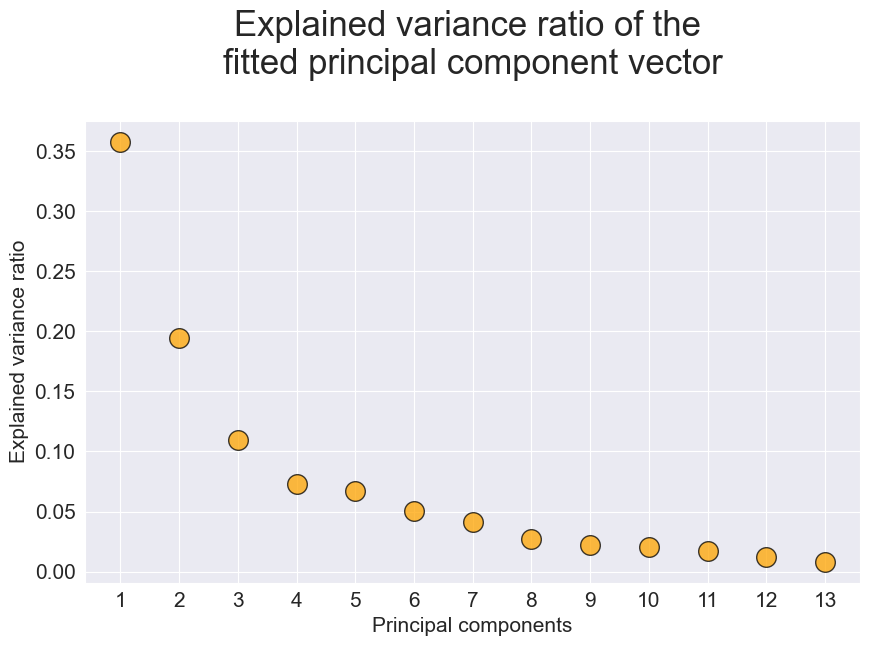

In [36]:
# Plot the explained variance ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_train_pca.explained_variance_ratio_))],
            y=X_train_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_train_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 19%. Therefore, if we just consider first two components, they together explain 55% of the total variance.

3. Showing better class separation using principal components

In [37]:
# Transform the scaled data set using the fitted PCA object

X_train_df = pca.transform(X_train)

# Put it in a data frame

X_train_df = pd.DataFrame(data=X_train_df)
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.401417,-0.564739,-1.209579,0.435481,1.324781,-1.218098,0.597393,0.645067,-0.467009,-0.259899,0.158448,-0.595089,-0.529434
1,-1.337483,-2.102134,0.066778,0.078632,0.856546,-0.462629,0.764564,-0.477916,-0.724172,-0.035174,-0.587506,-0.328047,0.037586
2,-2.332458,2.428732,0.236118,0.824514,-1.995578,0.012704,-1.246474,-0.054994,0.300943,0.065099,-0.571000,-0.178453,0.802569
3,-3.590107,1.327845,-0.151876,-1.247553,0.166988,0.705267,-0.054646,0.219535,-0.407557,0.240582,0.293212,0.261894,-0.158510
4,-0.529073,-2.555364,1.012343,-0.659930,1.086007,-0.392054,-0.719175,-0.552942,-0.141789,-0.422515,0.728943,-0.041812,-0.394382
5,-2.787804,0.302911,-1.415721,0.831610,-0.138766,-1.642007,0.424318,0.216917,-0.156108,-0.637609,0.602922,0.052591,0.106407
6,-2.409703,2.206980,-0.820272,1.031985,-0.320879,-0.820515,0.898071,0.231167,-0.097440,-0.332413,0.435965,0.399064,0.009402
7,-2.468312,0.026161,0.572153,-1.112517,0.657732,-0.137790,1.292854,-0.691904,0.229789,-0.069549,-0.109979,-0.405715,0.488614
8,-0.960781,-3.373967,-4.529852,0.719494,-0.034694,0.765722,-0.095642,0.486736,0.637382,0.178469,0.179247,-0.533161,-0.669659
9,0.133746,-2.265769,-0.377223,-0.758195,-0.795641,-1.192388,0.622393,0.354760,0.174796,-0.807711,0.078386,-0.142346,-0.000110


4. Plot the first two columns of this transformed data set with the color set to original ground truth class label

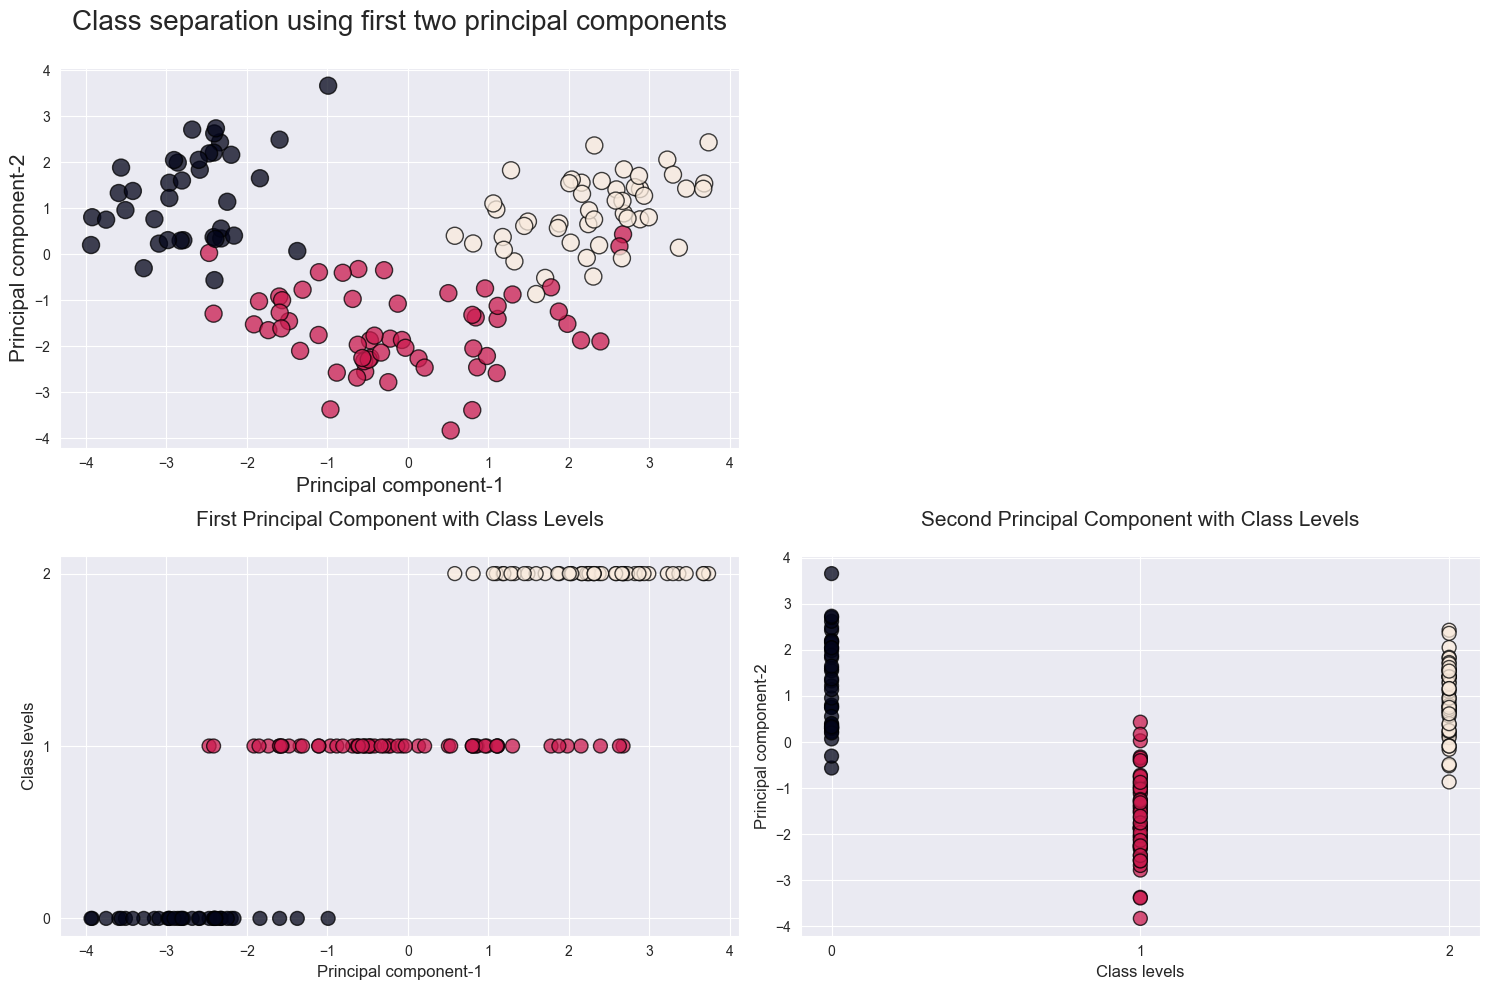

In [38]:
import numpy as np
import matplotlib.pyplot as plt

y_train_numeric, _ = pd.factorize(y_train)

# Get unique classes and map each class to a specific level for better visualization
unique_classes = np.unique(y_train_numeric)
class_levels = {cls: idx for idx, cls in enumerate(unique_classes)}


# Create new levels for each class for better separation in 1D plots
y_levels_pc1 = [class_levels[cls] for cls in y_train_numeric]  # Y-levels for PC1
x_levels_pc2 = [class_levels[cls] for cls in y_train_numeric]  # X-levels for PC2

plt.figure(figsize=(15,10))

# 2D scatter plot for the first two principal components
plt.subplot(2, 2, 1)
plt.scatter(X_train_df[0], X_train_df[1], c=y_train_numeric, edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n", fontsize=20)
plt.xlabel("Principal component-1", fontsize=15)
plt.ylabel("Principal component-2", fontsize=15)

# 1D plot for the first principal component with class levels
plt.subplot(2, 2, 3)
plt.scatter(X_train_df[0], y_levels_pc1, c=y_train_numeric, edgecolors='k', alpha=0.75, s=100)
plt.grid(True)
plt.title("First Principal Component with Class Levels\n", fontsize=15)
plt.xlabel("Principal component-1", fontsize=12)
plt.ylabel("Class levels", fontsize=12)
plt.yticks(list(class_levels.values()), labels=unique_classes)

# 1D plot for the second principal component with class levels
plt.subplot(2, 2, 4)
plt.scatter(x_levels_pc2, X_train_df[1], c=y_train_numeric, edgecolors='k', alpha=0.75, s=100)
plt.grid(True)
plt.title("Second Principal Component with Class Levels\n", fontsize=15)
plt.ylabel("Principal component-2", fontsize=12)
plt.xlabel("Class levels", fontsize=12)
plt.xticks(list(class_levels.values()), labels=unique_classes)

plt.tight_layout()
plt.show()


# QUIZ TIME

## Question 1:

Both student A and student B want to perform a PCA before learning a classfier. Who deserves a **neck slap**?

![Neck Slap GIF](https://media.giphy.com/media/9U5J7JpaYBr68/giphy.gif)

```python
# Student A

df = pd.read_csv('sample.csv')

X = df.drop('Target',axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# ...

# Student B

df = pd.read_csv('sample.csv')

X = df.drop('Target',axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
# ...
```

## Question 2: 

What is the role of eigenvalues and eigenvectors in PCA, and how do they relate to principal components?

eigenvectors define the derction in wich the data varie sthe most. Eigenvaluse represent the amount of variance captured by each principal component. 	The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues tell us how much variance is captured along these directions.

## Question 3: 

Explain why the first few principal components are sufficient for dimensionality reduction. How does the amount of variance captured by the principal components influence this decision?

The first few principal components are sufficient for dimensionality reduction because the first eigenvector captures the direction of maximum variance, and each successive eigenvector captures the next highest variance while being orthogonal (uncorrelated) to the previous ones.

The eigenvalues associated with the eigenvectors indicate how much variance each principal component captures. Since the first few principal components capture the majority of the variance in the dataset, they retain most of the important information while reducing the number of dimensions.

By selecting only the top 
𝑘
k principal components (which correspond to the largest eigenvalues), we can reduce dimensionality while preserving most of the variation in the data. This allows us to achieve a more compact representation of the dataset with minimal loss of information


## Question 4: 

Why is it important to center the data before applying PCA? What would happen if you skipped this step?

This ensures tht new axes variance correcctly. If the data is not centered, the first principal component may point towards the mean of the dataset rather than capturing the actual variance.
This can distort the results and lead to incorrect conclusions.

## Question 5: 

Describe the process of projecting the original data onto the new axes defined by the eigenvectors. What do we achieve by doing this?

he process of projecting the original data onto the new axes defined by the eigenvectors involves transforming the data into a new coordinate system where the principal components (eigenvectors) serve as the new axes. By projecting the data onto the selected eigenvectors, we reduce dimensions while retaining the most important variations in the dataset.

## Question 6: 

Given the previous PCA, identify which original feature contributes the most to the first principal component.

## Question/Task 7:

Please perform a dimensionality reduction of the full iris.csv dataset (*Name* column is the target) with PCA (dim=2). Create a nice color-coded plot to highlight the classes. How would you rate the PCA?

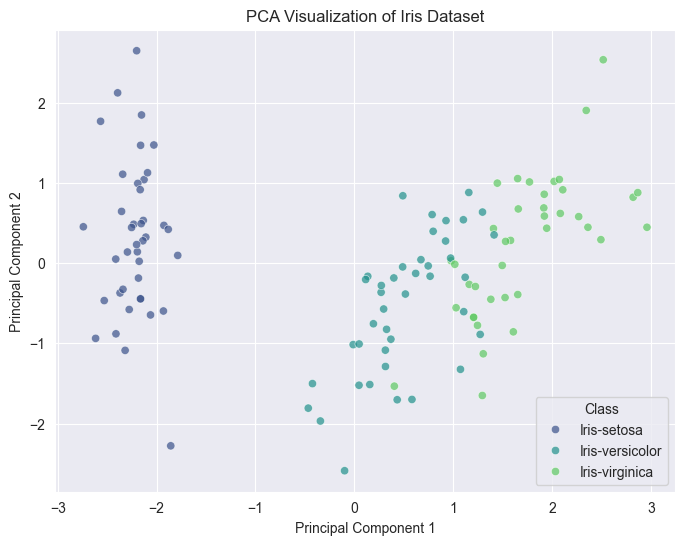

Explained variance by 2 components: 0.96


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df2 = pd.read_csv('data/iris.csv')

# Prepare features and target
X = df2.drop(columns=['Name'], errors='ignore')  # Fix typo in errors
y = df2['Name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Convert to DataFrame for visualization
df_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y_train.values

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Target', palette='viridis', alpha=0.7)
plt.title("PCA Visualization of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.grid(True)
plt.show()

# Evaluate PCA performance
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Explained variance by 2 components: {explained_variance:.2f}")


information is baout 96%, so there is much information in 2D

## Question/Task 8:

Using the Iris dataset, apply PCA for dimensionality reduction and train a classifier (Naive Bayes) using the transformed data. Create a single plot that visualizes both the true class labels and the predicted class labels for the test data, ensuring that both are distinguishable.

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

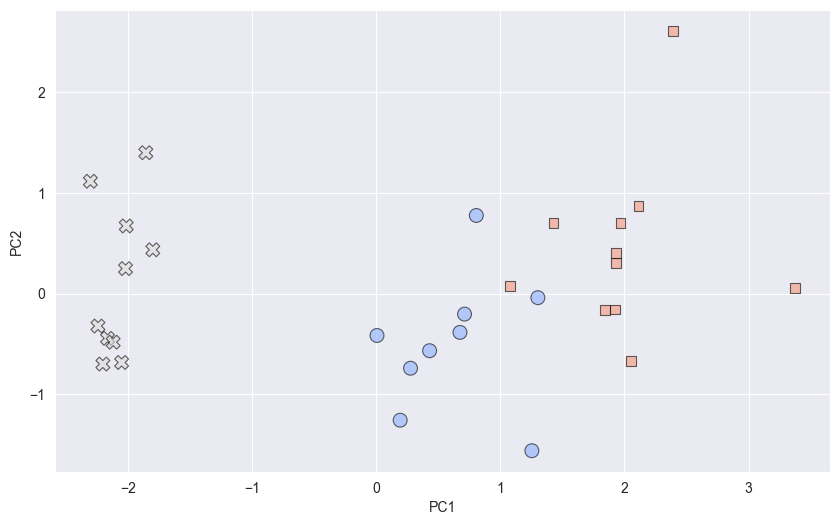

In [42]:
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
y_pred = classifer.fit(X_train, y_train)

# Convert to DataFrame for visualization
df_test_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
df_test_pca['True_Label'] = y_test.values
df_test_pca['Predicted_Label'] = y_pred

# Plot True Labels vs. Predicted Labels
fig, ax = plt.subplots(figsize=(10, 6))

# Plot True Labels
sns.scatterplot(
    data=df_test_pca, x='PC1', y='PC2', hue='True_Label', style='True_Label', 
    palette='coolwarm', alpha=0.6, edgecolor='black', s=100, label="True Labels", ax=ax
)

# Overlay Predicted Labels with different markers
sns.scatterplot(
    data=df_test_pca, x='PC1', y='PC2', hue='Predicted_Label', style='Predicted_Label', 
    palette='dark', marker='X', alpha=0.8, s=150, label="Predicted Labels", ax=ax
)

plt.title("PCA + Naive Bayes Classification on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

